# Info
(C) convention, for programming standard violation

(R) refactor, for bad code smell

(W) warning, for python specific problems

(E) error, for much probably bugs in the code

(F) fatal, if an error occurred which prevented pylint from doing

[source](https://pylint.pycqa.org/_/downloads/en/pylint-2.1.0/pdf/)

http://pylint-messages.wikidot.com/all-codes

https://pycodequ.al/docs/pylint-messages.html

In [1]:
%pip install pigeon-jupyter

Note: you may need to restart the kernel to use updated packages.


# Environment configuration

In [56]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams
palette_color = 'Blues_r'
colors = sns.color_palette(palette_color, as_cmap=True)
sns.set()
pd.set_option('display.max_rows', None)

In [3]:
X0 = 6
Y0 = 4

X1 = 9
Y1 = 6

X2 = 12
Y2 = 9

X3 = 15
Y3 = 12

category_map = {'W':'Warning', 'R':'Refactor','C':'Convention'}

In [4]:
def set_plot_size(w, h):
        rcParams['figure.figsize'] = w, h

def reset_plot_size():
    set_plot_size(X1,Y1)

def make_url(row):
    gh = 'https://github.com/'
    file = row.filename.split('/')[1]
    url = f'{gh}/{row.repo}/tree/{row.commit}/{file}'
    return url

def barplot(d, x, y, **kwargs):
    plot = sns.barplot(data=d,x=x,y=y,ax=kwargs.get('ax'), hue = kwargs.get('hue'))
    plot.set_xlabel(kwargs.get('x_label'))
    plot.set_ylabel(kwargs.get('y_label'))
    plot.set_title(kwargs.get('title'))
    return plot

def violinplot(d, **kwargs):
    plot = sns.violinplot(data=d, cut=0,inner='quartile',ax=kwargs.get('ax'))    
    plot.set_xlabel(kwargs.get('x_label'))
    plot.set_ylabel(kwargs.get('y_label'))
    plot.set_title(kwargs.get('title'))
    return plot

reset_plot_size()

In [5]:
df = pd.read_parquet('data.parquet')
df = df.loc[df.symbol != 'fatal']
df = df.loc[df.linter == 'pylint']
df = df.reset_index(drop=True)

# Data preparation

In [116]:
df.filename = df.filename.apply(lambda x: x.replace('dumps/',''))
df = df.loc[df.type.isin(['W','C','R'])]

## Mark relevant pitfalls

In [123]:
detected_pitfalls = df.number.unique()
all_codes = pd.read_csv('codes.csv')
relevant_codes = all_codes.loc[all_codes.code.isin(detected_pitfalls)]
relevant_codes = relevant_codes.loc[relevant_codes.is_pitfall != 0]
relevant_codes.loc[relevant_codes.is_pitfall != 1].reset_index(drop=True)

,code,symbol,is_pitfall
0,C0410,multiple-imports,NaN
1,C0411,wrong-import-order,NaN
2,C0412,ungrouped-imports,NaN
3,C0413,wrong-import-position,NaN
4,C0414,useless-import-alias,NaN
5,C0415,import-outside-toplevel,NaN
6,C1801,len-as-condition,NaN


In [110]:
relevant_codes = relevant_codes.loc[relevant_codes.is_pitfall == 1].reset_index(drop = True)
relevant_codes

,code,symbol,is_pitfall
0,W0102,dangerous-default-value,1.0
1,W0122,exec-used,1.0
2,W0123,eval-used,1.0
3,W0201,attribute-defined-outside-init,1.0
4,W0212,protected-access,1.0
5,W0221,arguments-differ,1.0
6,W0231,super-init-not-called,1.0
7,W0233,non-parent-init-called,1.0
8,W0311,bad-indentation,1.0
9,W0401,wildcard-import,1.0


In [112]:
#df['url'] = df.apply(make_url, axis=1)
w = df.loc[df.type == 'W']
c = df.loc[df.type == 'C']
r = df.loc[df.type == 'R']

# Data overview

## Distribution by kind of flaw

## Code counts

[Text(0, 0.0, ''),
 Text(0, 500.0, ''),
 Text(0, 1000.0, ''),
 Text(0, 1500.0, ''),
 Text(0, 2000.0, ''),
 Text(0, 2500.0, ''),
 Text(0, 3000.0, ''),
 Text(0, 3500.0, ''),
 Text(0, 4000.0, '')]

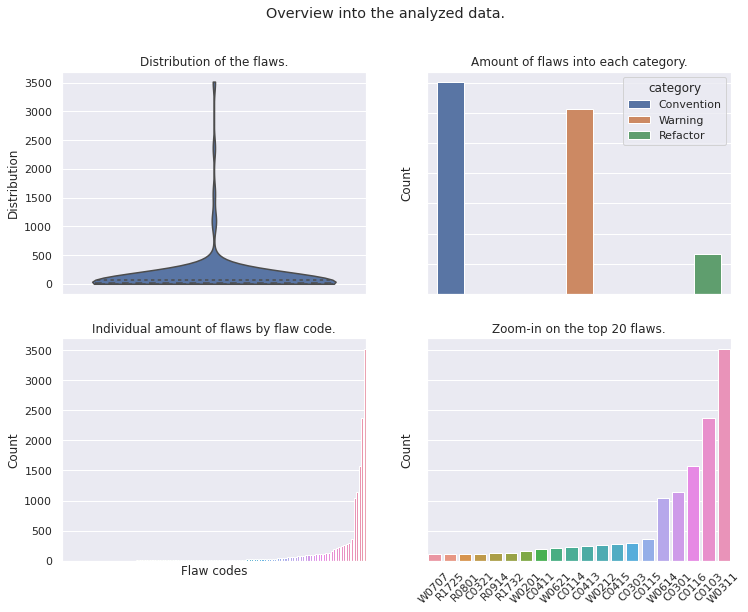

In [113]:
set_plot_size(X2,Y2)

code_counts = df.number.value_counts().reset_index()
code_counts.columns = ['code', 'count']
code_counts = code_counts.sort_values(by='count', ascending=True)
code_counts = code_counts.reset_index(drop=True)

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)


fig.suptitle('Overview into the analyzed data.')
#General violinplot
violinplot(code_counts['count'].values,
           title = 'Distribution of the flaws.',
           y_label = 'Distribution',           
           ax = ax0
          )
ax0.set_xticks([])

#Category barplot
category_counts = df.type.value_counts().reset_index()
category_counts.columns = ['category','count']
category_counts.category = category_counts.category.apply(lambda x : category_map[x])
barplot(category_counts,
        x = 'category',
        y = 'count',
        y_label = 'Count',
        title = 'Amount of flaws into each category.',
        hue = 'category',
        ax = ax1
       )
ax1.set_yticklabels([])
ax1.set_xticklabels([])



#General barplot
barplot(code_counts,
        x = 'code',
        y_label = 'Count',
        x_label = 'Flaw codes',
        y = 'count',
        title = 'Individual amount of flaws by flaw code.',
        ax=ax2
       )
ax2.set_xticks([])


#Zoom barplot
amount = 20
bigger = code_counts.tail(amount)
right = barplot(bigger,
                x = 'code',
                y = 'count',
                y_label = 'Count',
                title = f'Zoom-in on the top {amount} flaws.',
                ax = ax3
               )
ax3.tick_params(axis = 'x', labelrotation = 45 )
ax3.set_yticklabels([])








# Playground

array(['C0114', 'C0302', 'C0103', 'W0201', 'R0903', 'W1505', 'R0913',
       'R1732', 'R1718', 'W0621', 'R0914', 'W0612', 'R1705', 'W0707',
       'R0912', 'C0415', 'C0115', 'C0116', 'R0915', 'C0301', 'R0402',
       'C0413', 'R1702', 'W0106', 'W0212', 'W0703', 'W0622', 'C0123',
       'R1721', 'C1801', 'W1508', 'W1201', 'W1203', 'C0411', 'W0611',
       'W0702', 'C0206', 'R1710', 'W0404', 'W0603', 'W0122', 'W0311',
       'R1725', 'R0205', 'W1401', 'W0511', 'C0325', 'C0321', 'W0120',
       'R0902', 'R1719', 'R1720', 'R1728', 'R1723', 'W0613', 'R0201',
       'R0904', 'R1707', 'R0801', 'R1722', 'C0410', 'W0631', 'W1510',
       'C0201', 'R1711', 'W0401', 'W0614', 'C0303', 'C0200', 'C0412',
       'C0121', 'C0305', 'R1716', 'W0105', 'C0122', 'R1714', 'W0223',
       'R1730', 'R0916', 'W0601', 'W0127', 'C0304', 'R1729', 'W0102',
       'R1724', 'R0911', 'W0641', 'W0104', 'C0207', 'W0107', 'W0109',
       'R1703', 'C0112', 'W0706', 'C0414', 'R1704', 'W0231', 'W0123',
       'W0238', 'W02